## Experimento para ver el efecto de una capa POOL 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [8]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [9]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [10]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 37s 42ms/step - loss: 0.8586 - accuracy: 0.7165 - val_loss: 0.6367 - val_accuracy: 0.7800
Epoch 2/3
860/860 [==============================] - 36s 41ms/step - loss: 0.5270 - accuracy: 0.8087 - val_loss: 0.4829 - val_accuracy: 0.8258
Epoch 3/3
860/860 [==============================] - 36s 42ms/step - loss: 0.4715 - accuracy: 0.8298 - val_loss: 0.4313 - val_accuracy: 0.8522


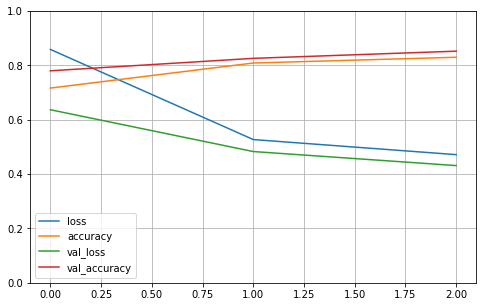

In [13]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4666 - accuracy: 0.8351


In [15]:
X_new = X_test[:3]

In [16]:
y_pred = model_a.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [17]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


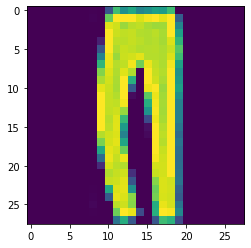

In [18]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [19]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 23s 26ms/step - loss: 0.8684 - accuracy: 0.7140 - val_loss: 0.5768 - val_accuracy: 0.7872
Epoch 2/3
860/860 [==============================] - 22s 26ms/step - loss: 0.5321 - accuracy: 0.8090 - val_loss: 0.5259 - val_accuracy: 0.8056
Epoch 3/3
860/860 [==============================] - 22s 26ms/step - loss: 0.4769 - accuracy: 0.8282 - val_loss: 0.4487 - val_accuracy: 0.8448


In [20]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4848 - accuracy: 0.8259


# Entrenamiento con redes mas profundas

In [49]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), strides=3, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [50]:
model_a.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)             

In [51]:
model_b.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 6, 6, 64)          8256      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 2, 2, 128)         32896     
_________________________________________________________________
flatten_13 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 300)               153900    
_________________________________________________________________
dense_40 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [52]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [53]:
model_history_a = model_a.fit(X_train, y_train, epochs=5,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
860/860 [==============================] - 49s 57ms/step - loss: 1.6230 - accuracy: 0.4017 - val_loss: 1.2161 - val_accuracy: 0.5918
Epoch 2/5
860/860 [==============================] - 49s 57ms/step - loss: 0.7681 - accuracy: 0.7102 - val_loss: 0.6913 - val_accuracy: 0.7360
Epoch 3/5
860/860 [==============================] - 48s 56ms/step - loss: 0.6531 - accuracy: 0.7542 - val_loss: 0.5831 - val_accuracy: 0.7830
Epoch 4/5
860/860 [==============================] - 49s 57ms/step - loss: 0.5917 - accuracy: 0.7768 - val_loss: 0.5749 - val_accuracy: 0.7936
Epoch 5/5
860/860 [==============================] - 48s 55ms/step - loss: 0.5523 - accuracy: 0.7927 - val_loss: 0.5870 - val_accuracy: 0.7858


In [54]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6510 - accuracy: 0.7603


In [55]:
model_history_b = model_b.fit(X_train, y_train, epochs=5,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
860/860 [==============================] - 15s 17ms/step - loss: 1.4053 - accuracy: 0.5507 - val_loss: 0.8539 - val_accuracy: 0.7152
Epoch 2/5
860/860 [==============================] - 14s 16ms/step - loss: 0.7424 - accuracy: 0.7321 - val_loss: 0.7146 - val_accuracy: 0.7340
Epoch 3/5
860/860 [==============================] - 14s 16ms/step - loss: 0.6549 - accuracy: 0.7627 - val_loss: 0.6393 - val_accuracy: 0.7750
Epoch 4/5
860/860 [==============================] - 14s 16ms/step - loss: 0.6075 - accuracy: 0.7790 - val_loss: 0.5849 - val_accuracy: 0.7830
Epoch 5/5
860/860 [==============================] - 13s 15ms/step - loss: 0.5742 - accuracy: 0.7906 - val_loss: 0.5920 - val_accuracy: 0.7726


In [56]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6345 - accuracy: 0.7570
